# Lending Club Case Study

### The Lending Club follows the below process to lend loans to its borrowers

<img src = 'https://cdn.upgrad.com/UpGrad/temp/7afbce98-8ecc-41c6-96d8-981cba7d343f/Loan_image.png' width="800" height="800">

#### Importing the libraries

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
from IPython.display import display, Markdown

In [2]:
## Read the data
df = pd.read_csv('loan.csv')

C:\Users\TCS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### The above query has raised an error, let's add the low_memory=False as suggested

In [3]:
## Read the data
df = pd.read_csv('loan.csv',low_memory=False)

#### Let's suppress future warnings from here as seaborn and matplotlib gives a lot of warnings

In [4]:
import warnings
warnings.filterwarnings("ignore")

## 1. Data Understanding

In [5]:
## Let's check for the datatypes
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

#### From first look, most values are either int or float.

In [6]:
## Check the shape and some records
print(df.shape)
df.head()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### There are 39717 rows and 111 columns

In [7]:
#### Let's check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


##### We can also see that there are NAN values in some columns let's check the percentage of null columns for each column and decide if we can do something with the NAN values

In [8]:
## Check for number of null values in all the columns
df.isnull().sum().sort_values(ascending=False)

total_il_high_credit_limit    39717
mo_sin_old_rev_tl_op          39717
bc_util                       39717
bc_open_to_buy                39717
avg_cur_bal                   39717
                              ...  
pub_rec                           0
open_acc                          0
inq_last_6mths                    0
earliest_cr_line                  0
id                                0
Length: 111, dtype: int64

## 2. Data Cleaning/ Fill rate Steps

#### We observe that there are some columns, foe which all the 39717 records are missing, there is no point in keeping those columns

#### Let's check which are these columns

In [9]:
# Checking the columns with no data
df.loc[:,df.isnull().sum() == len(df.index)].columns

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

#### We see that there are 54 such columns which have all the values as null, we can comfortably delete these columns as these are not giving us any valueable information

In [10]:
# dropping the columns with no data
df = df.drop(df.loc[:,df.isnull().sum() == len(df.index)].columns, axis =1)

#### Let's check the dataframe shape once again to see if the columns got dropped

In [11]:
#Checking the shape
df.shape

(39717, 57)

#### The 54 columns out of the total 111 columns have been removed, so there are 57 columns remaining now

#### Let's now look for the missing values in these columns, this time checking the percentage so that we can decide if there are some more columns which need operation like deletion or imutation

In [13]:
# Checking percentage of null values in decreasing order
round(100 * df.isnull().sum().sort_values(ascending = False)/len(df.index),2)

next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
collection_recovery_fee        0.00
acc_now_delinq                 0.00
application_type               0.00
url                            0.00
pymnt_plan                     0.00
loan_status                    0.00
issue_d                        0.00
verification_status            0.00
annual_inc                     0.00
home_ownership                 0.00
delinq_amnt                    0.00
sub_grade                      0.00
grade                          0.00
installment                 

#### The 2 columns __next_pymnt_d__ and __mths_since_last_record__ have more than 75% records as null, let's take these into consideration first

In [14]:
# Checking records with more than 75 % missing data
df.loc[:,round(100 * df.isnull().sum().sort_values(ascending = False)/len(df.index),2) > 75]

,mths_since_last_record,next_pymnt_d
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,Jun-16
...,...,...
39712,0.0,NaN
39713,0.0,NaN
39714,0.0,NaN
39715,0.0,NaN


#### Let's explore the columns one by one, and check for the not null values

In [15]:
# Checking for not null data
df[df.next_pymnt_d.notnull()].next_pymnt_d

4        Jun-16
32       Jun-16
39       Jun-16
86       Jun-16
95       Jun-16
          ...  
15972    Jun-16
15981    Jun-16
16361    Jun-16
16609    Jun-16
18215    Jun-16
Name: next_pymnt_d, Length: 1140, dtype: object

#### There are just 1140 rows, having values
#### Let's check for the unique values

In [16]:
# Checking for the unique values
df[df.next_pymnt_d.notnull()].next_pymnt_d.unique()

array(['Jun-16', 'Jul-16'], dtype=object)

#### There are only 2 values which are recurring and these are Jun-16 and Jul-16

#### It doesn't make much sense to neither keep this column nor to impute it as most of the values are still empty
#### Let's drop this column

In [17]:
# Dropping the column
df = df.drop(['next_pymnt_d'],axis =1)

#### Let's check the shape now

In [18]:
# Checking the shape
df.shape

(39717, 56)

#### A column is reduced now

#### Let's check for __mths_since_last_record__ column

In [19]:
# Checking the records
df[df.mths_since_last_record.notnull()].mths_since_last_record

66       113.0
70       105.0
77        97.0
94        33.0
161       93.0
         ...  
39712      0.0
39713      0.0
39714      0.0
39715      0.0
39716      0.0
Name: mths_since_last_record, Length: 2786, dtype: float64

#### There are 2786 such values

#### Taking a look at the type of values in the column

In [20]:
# Checking the value counts
df[df.mths_since_last_record.notnull()].mths_since_last_record.value_counts()

0.0      670
104.0     61
89.0      60
113.0     59
111.0     57
        ... 
20.0       1
19.0       1
6.0        1
7.0        1
14.0       1
Name: mths_since_last_record, Length: 111, dtype: int64

#### Most of the records are 0, 670 out of 2786 values and 111 unique records

#### Its safe to delete these records too, since we have very less percentage of data available

In [21]:
# Dropping the column
df = df.drop(['mths_since_last_record'],axis =1)

#### Let's check the shape now

In [22]:
# Checking the shape
df.shape

(39717, 55)

#### Now, the columns with more than 75% null values are eliminated, let's explore the dataset more

#### One more column is reduced now

#### Let's check for the unique values in the dataset

In [23]:
# Checking the no of unique records
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

#### We can see that a lot of columns have only 1 unique values, since there is no variation in data for these columns, it does not make sense to keep these columns

#### Checking for the columns which have only 1 unique values

In [24]:
# Checking for the columns which have only one type of values
df.loc[:,df.nunique().values == 1]

,pymnt_plan,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
39712,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
39713,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
39714,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
39715,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN


#### We observe that for columns, __collections_12_mths_ex_med__, __chargeoff_within_12_mths__ and __tax_liens__ values are either 0 or NAN, which gives no value addition
#### Its safe to drop these columns

In [25]:
# Assigning the droppable columns
droppable_columns = df.loc[:,df.nunique().values ==1].columns

#### Let's drop these columns

In [26]:
# Dropping the column
df = df.drop(droppable_columns, axis = 1)

#### Let's see the shape now

In [27]:
# Checking the shape
df.shape

(39717, 46)

#### Now the dataset has 46 columns

#### But, there are certain columns that are very customer behaviour variable and they do not convey much information to us as all the customers are already approved and these variables were not available at the time of loan application. So, its safe to delete these variables.
#### Creating a list of customer behaviour variables

In [28]:
# Creating a list for customer behaviour variables
customer_behaviour_columns = ['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d']

#### Dropping the customer behaviour columns

In [29]:
# Dropping the columns
df = df.drop(customer_behaviour_columns, axis = 1)

In [30]:
#### Checking the shape of data now
df.shape

(39717, 26)

#### Now, we are left with 26 columns

#### Let's now check the percentage again, but only for percentage > 0.0, let's create a function to do that

In [31]:
# Function to check more than 0% missing data
def missing_values_more_than_zero(data):
    lst_cols = []
    per = round(100 * data.isnull().sum().sort_values(ascending = False)/len(data.index),2)
    for i,j in per.iteritems():
        if j > 0.0:
            lst_cols.append(i)
    return round(100 * data[lst_cols].isnull().sum().sort_values(ascending = False)/len(data[lst_cols].index),2)

#### Let's apply the above function to check columns with some missing values

In [32]:
# Calling the above function
missing_values_more_than_zero(df)

mths_since_last_delinq    64.66
desc                      32.58
emp_title                  6.19
emp_length                 2.71
pub_rec_bankruptcies       1.75
title                      0.03
dtype: float64

#### Let's check for __mths_since_last_delinq__ column since it is top most in the list

In [33]:
# Checking the records
df[df.mths_since_last_delinq.notnull()].mths_since_last_delinq

3        35.0
4        38.0
16       61.0
18        8.0
27       20.0
         ... 
39712     0.0
39713     5.0
39714     0.0
39715     0.0
39716    11.0
Name: mths_since_last_delinq, Length: 14035, dtype: float64

#### Taking a look at the type of values in the column

In [34]:
#Checking the avlue counts
df[df.mths_since_last_delinq.notnull()].mths_since_last_delinq.value_counts()

0.0      443
15.0     252
23.0     247
30.0     247
24.0     241
        ... 
97.0       1
96.0       1
107.0      1
89.0       1
106.0      1
Name: mths_since_last_delinq, Length: 95, dtype: int64

#### Here, the most frequent is 0.0 and other values are significant in count too, but no concrete decision can be made on this at this point

#### Its safe to drop this column too, since it contains significant null values

In [35]:
# Dropping the column
df = df.drop(['mths_since_last_delinq'],axis =1)

#### Let's check the shape now

In [36]:
#Checking the shape
df.shape

(39717, 25)

#### One more column is reduced now and the dataset has 25 columns

#### Let's check the percentage of null values again

In [37]:
# Calling the function
missing_values_more_than_zero(df)

desc                    32.58
emp_title                6.19
emp_length               2.71
pub_rec_bankruptcies     1.75
title                    0.03
dtype: float64

#### Let's check for the __desc__ column now,as it now tops the list of columns with most missing val

In [38]:
# Checking top 5 records
df.desc.head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

#### This column can be deleted too as it gives only text information

In [39]:
# Dropping the column
df = df.drop(['desc'],axis =1)

#### Checking the shape again

In [40]:
# Checking the shape
df.shape

(39717, 24)

#### Now there are 24 columns, let's check the percentage once again

In [41]:
# Callling the function
missing_values_more_than_zero(df)

emp_title               6.19
emp_length              2.71
pub_rec_bankruptcies    1.75
title                   0.03
dtype: float64

#### Next column with the most missing values is __emp_title__, let's take a look at it

In [42]:
# Checking top 5 records
df.emp_title.head()

0                         NaN
1                       Ryder
2                         NaN
3         AIR RESOURCES BOARD
4    University Medical Group
Name: emp_title, dtype: object

#### This is also a text column, and contains the name of the employer, not relevent for analysis. So, we can drop this

In [43]:
# Dropping the column
df = df.drop(['emp_title'],axis =1)

#### With one more column gone, let's check the missing values percentage wise

In [44]:
# Calling the function
missing_values_more_than_zero(df)

emp_length              2.71
pub_rec_bankruptcies    1.75
title                   0.03
dtype: float64

#### Next comes the __emp_length__ column, let's explore it

In [45]:
# Checking value counts
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

#### Let's check for unique values

In [46]:
# Checking unique values
df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

#### We can see that all the above data is between <1 year and 10+ years and the rest of the values are null. 
#### We can assume that the null values are for people who are having some permanent work. Also, the most repeating values is for 10+ years.
#### Considering the above points, we can impute the null values with the mode, that is 10+ years

In [47]:
# Imputing the null values with mode
df.emp_length= df.emp_length.fillna(df.emp_length.mode()[0])

#### Cross check if any null values is still remaining

In [48]:
# Checking for null values
df[df.emp_length.isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies


#### Now there is no null record in __emp_length__ column, let's take a look at it now

In [49]:
# Checking the records
df.emp_length

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

#### We notice that there are symbols like < and + in the data, we can clean these extra symbols

In [50]:
# Cleaning the column
df.emp_length = df.emp_length.apply(lambda x: (x[1:] if '<'in x else (x.replace('+','') if '+' in x else x)).replace(' year','').replace('s','')).astype('float64')

In [51]:
## Checking the emp_length now
df.emp_length

0        10.0
1         1.0
2        10.0
3        10.0
4         1.0
         ... 
39712     4.0
39713     3.0
39714     1.0
39715     1.0
39716     1.0
Name: emp_length, Length: 39717, dtype: float64

#### Let's check for the percentage wise missing records 

In [52]:
# Calling the function
missing_values_more_than_zero(df)

pub_rec_bankruptcies    1.75
title                   0.03
dtype: float64

#### The next column is __pub_rec_bankruptcies__, let's explore it

In [53]:
# Checking for unique records
df.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

#### Check for number of null values in __pub_rec_bankruptcies__

In [54]:
# Taking count of null values
df.pub_rec_bankruptcies.isnull().sum()

697

#### There are 697 rows with missing __pub_rec_bankruptcies__ data, Let's do a value count on this record with the relative frequency

In [55]:
# Checking % of data
df.pub_rec_bankruptcies.value_counts(normalize=True)

0.0    0.956920
1.0    0.042901
2.0    0.000179
Name: pub_rec_bankruptcies, dtype: float64

#### Most of the values are 0, more than 95%, so its safe to impute the null values with these

In [56]:
#### Let's take this value in a variable
most_freq =  df.pub_rec_bankruptcies.mode()[0]

In [57]:
#Replace the nulls in the pub_rec_bankruptcies column with the most frequent value
df.pub_rec_bankruptcies = df.pub_rec_bankruptcies.fillna(most_freq)

#### Let's check for the null values again to cross check

In [58]:
# Checking for number of null values
df.pub_rec_bankruptcies.isnull().sum()

0

### Let's check the shape of the dataframe

In [59]:
# Checking the shape
df.shape

(39717, 23)

#### Let's check for the percentage wise missing records, again

In [60]:
# Calling the function
missing_values_more_than_zero(df)

title    0.03
dtype: float64

#### Let's explore the title column now

In [61]:
# Checking top 5 records
df.title.head()

0                Computer
1                    bike
2    real estate business
3                personel
4                Personal
Name: title, dtype: object

#### Let's do a count of above records

#### This is also a text column and can be deleted completely

In [62]:
# Dropping the column
df = df.drop('title', axis = 1)

#### Let's check the shape of the dataset

In [63]:
# Checking the shape
df.shape

(39717, 22)

#### Let's check for the percentage wise missing records, to check if all the columns are havimg 100% fill rate

In [64]:
# Calling the function
missing_values_more_than_zero(df)

Series([], dtype: float64)

#### Now, there is no missing data in any column

#### Let's check the shape, the columns and the top 5 records

In [65]:
print(df.shape)
print(df.columns)
df.head()

(39717, 22)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'zip_code', 'addr_state', 'dti',
       'pub_rec_bankruptcies'],
      dtype='object')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,annual_inc,verification_status,issue_d,loan_status,url,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,8.72,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,20.00,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,972xx,OR,17.94,0.0


#### Looking at all the columns, we can see that the columns like __id__, __member_id__ , __url__ and __zip_code__ are not adding much info to the dataset, so we can safely remove these columns too

In [66]:
# Dropping the columns
df = df.drop(['id', 'member_id', 'url','zip_code'], axis = 1)

#### Let's check the shape and top 5 records now

In [67]:
print(df.shape)
df.head()

(39717, 18)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1.0,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0.0


#### Now, we have 39635 records and 19 columns. Our data understanding process is complete at this point.

#### Now, the dataframe is clean, let's see the percentage of retained rows, we had __39717__ rows initially

In [68]:
## Check the percentage of data retained
round(100* df.shape[0]/39717,2)

100.0

#### We have retained all the rows, let's proceed with conversion of column data types

###  Coverting data types of columns to appropriate data types

#### Checking the data types

In [69]:
# Checking the data types
df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length              float64
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

#### There are quite a lot of datatypes that are of object datatype, we need to convert them into appropriate datatype.
#### Let's take a look at only these columns together

In [70]:
# checking for object datatypes
df.loc[:,df.dtypes == 'object']

,term,int_rate,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state
0,36 months,10.65%,B,B2,RENT,Verified,Dec-11,Fully Paid,credit_card,AZ
1,60 months,15.27%,C,C4,RENT,Source Verified,Dec-11,Charged Off,car,GA
2,36 months,15.96%,C,C5,RENT,Not Verified,Dec-11,Fully Paid,small_business,IL
3,36 months,13.49%,C,C1,RENT,Source Verified,Dec-11,Fully Paid,other,CA
4,60 months,12.69%,B,B5,RENT,Source Verified,Dec-11,Current,other,OR
...,...,...,...,...,...,...,...,...,...,...
39712,36 months,8.07%,A,A4,MORTGAGE,Not Verified,Jul-07,Fully Paid,home_improvement,CO
39713,36 months,10.28%,C,C1,RENT,Not Verified,Jul-07,Fully Paid,credit_card,NC
39714,36 months,8.07%,A,A4,MORTGAGE,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA
39715,36 months,7.43%,A,A2,MORTGAGE,Not Verified,Jul-07,Fully Paid,other,MD


#### Looking at above data, the columns __term__, __grade__, __sub_grade__, __home_ownership__, __verification_status__, __addr_state__ and __pub_rec_bankruptcies__ are having category like values, and can be converted to category data type

In [71]:
#### Let's assign these column to a variable named cat_cols
cat_cols = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'addr_state', 'pub_rec_bankruptcies']

#### Converting to category datatype

In [72]:
# Converting to category datatype
df[cat_cols] = df[cat_cols].astype('category')

#### Let's look at remaining object type columns

In [73]:
# Checking for object datatype
df.loc[:,df.dtypes == 'object']

,int_rate,issue_d,loan_status,purpose
0,10.65%,Dec-11,Fully Paid,credit_card
1,15.27%,Dec-11,Charged Off,car
2,15.96%,Dec-11,Fully Paid,small_business
3,13.49%,Dec-11,Fully Paid,other
4,12.69%,Dec-11,Current,other
...,...,...,...,...
39712,8.07%,Jul-07,Fully Paid,home_improvement
39713,10.28%,Jul-07,Fully Paid,credit_card
39714,8.07%,Jul-07,Fully Paid,debt_consolidation
39715,7.43%,Jul-07,Fully Paid,other


#### From the above, 1 values are in percentage and 1 is of date type, Let's convert the date types first

In [74]:
#### Take the date types columns in a variable
date_types = ['issue_d']

#### Let's check the data for the above column

In [75]:
# Checking the records
df[date_types]

,issue_d
0,Dec-11
1,Dec-11
2,Dec-11
3,Dec-11
4,Dec-11
...,...
39712,Jul-07
39713,Jul-07
39714,Jul-07
39715,Jul-07


#### Check if the datatype is datetime already

In [76]:
# Check for datatype datetime
isinstance(df.loc[0,'issue_d'],datetime)

False

#### It is not already, Let's create a column to convert to date time

In [77]:
# Creating the function
date_converter = lambda x: x.apply(lambda y: datetime.strptime(y,"%b-%y"))

#### Let's apply this function to our date type columns 

In [78]:
# Applying the above function
df[date_types] = df[date_types].apply(date_converter)

#### Checking the data now

In [79]:
# Checking the records
df[date_types]

,issue_d
0,2011-12-01
1,2011-12-01
2,2011-12-01
3,2011-12-01
4,2011-12-01
...,...
39712,2007-07-01
39713,2007-07-01
39714,2007-07-01
39715,2007-07-01


#### Check if the data type is date time now

In [80]:
# Checking for datatype datetime
isinstance(df.loc[0,'issue_d'],datetime)

True

#### Let's look at remaining object type columns

In [81]:
#Checking for datatype object records
df.loc[:,df.dtypes == 'object']

,int_rate,loan_status,purpose
0,10.65%,Fully Paid,credit_card
1,15.27%,Charged Off,car
2,15.96%,Fully Paid,small_business
3,13.49%,Fully Paid,other
4,12.69%,Current,other
...,...,...,...
39712,8.07%,Fully Paid,home_improvement
39713,10.28%,Fully Paid,credit_card
39714,8.07%,Fully Paid,debt_consolidation
39715,7.43%,Fully Paid,other


#### Let's remove % from this columns so that these can be used in the analysis

In [82]:
# Removing %
df.int_rate =  df.loc[:,'int_rate'].apply(lambda x: x[:-1]).astype('float64')

#### Let's check for the datatypes again

In [83]:
# Checking for datatype
df.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                          category
int_rate                       float64
installment                    float64
grade                         category
sub_grade                     category
emp_length                     float64
home_ownership                category
annual_inc                     float64
verification_status           category
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                    category
dti                            float64
pub_rec_bankruptcies          category
dtype: object

### Now, the columns are either int, float, category or datetime and 1 object

### Let's take the backup of the above dataframe in a new frame named __loan_df__ 

In [84]:
# Taking a backup
loan_df = df.copy()

#### Taking a look at top 5 records

In [85]:
# Checking the top 5 records
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0.0


### In our problem statement, we are given that when a person applies for a loan, and if the loan is acccepted by the company, there are 3 possible scenarios :

- __Fully paid__: Applicant has fully paid the loan (the principal and the interest rate)

- __Current__: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

- __Charged-off__: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

#### As our final outcome is to predict __default/not default__, we can create a column that will keep information about __default/ not default__

#### Also, the data with 'Fully Paid' status is not telling us much about the default, so we can remove records for fully paid as well

In [86]:
# Keeping only two types of status
loan_df = loan_df[loan_df.loan_status.isin(['Fully Paid', 'Charged Off'])]

### Creating a derived column

In [87]:
#### Creating a new column default_status
loan_df['default_status'] = loan_df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

#### Let's do a value count on the default status

In [88]:
# Checking for unique records
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [89]:
# Doing a value counts
loan_df.default_status.value_counts()

0    32950
1     5627
Name: default_status, dtype: int64

#### Let's check the percentage of defaulters

In [90]:
# Checking for records
loan_df.loan_status.head(100)

0       Fully Paid
1      Charged Off
2       Fully Paid
3       Fully Paid
5       Fully Paid
          ...     
102     Fully Paid
103     Fully Paid
104     Fully Paid
105    Charged Off
106     Fully Paid
Name: loan_status, Length: 100, dtype: object

#### Checking the default rate

In [91]:
# Checking default rate
round(100 *loan_df.default_status.value_counts()[1]/loan_df.default_status.count(),2)

14.59

#### There is an overall default rate of 14.59 %

## 3. Analysis

#### Let's check the colums for outliers according to the data type, let's filter out continuous and categorical

#### Selecting the continuous variables with int datatype

In [92]:
## Check for int data types
loan_df.loc[:,loan_df.dtypes == 'int64']

,loan_amnt,funded_amnt,default_status
0,5000,5000,0
1,2500,2500,1
2,2400,2400,0
3,10000,10000,0
5,5000,5000,0
...,...,...,...
39712,2500,2500,0
39713,8500,8500,0
39714,5000,5000,0
39715,5000,5000,0


#### Let's convert loan amount and funded amount to float for more uniformity in the data

In [93]:
# Convert to float type
loan_df.loc[:,['loan_amnt','funded_amnt']] = loan_df.loc[:,['loan_amnt','funded_amnt']].astype('float64')

#### Let's check the columns __loan_amnt__, __funded_amnt__ and __funded_amnt_inv__ columns

In [94]:
# Checking amount related columns
loan_df.loc[:,['loan_amnt','funded_amnt', 'funded_amnt_inv']].head()

,loan_amnt,funded_amnt,funded_amnt_inv
0,5000.0,5000.0,4975.0
1,2500.0,2500.0,2500.0
2,2400.0,2400.0,2400.0
3,10000.0,10000.0,10000.0
5,5000.0,5000.0,5000.0


#### Let's understand the meaning of these columns first:
- __loan_amnt__ - Amount that the borrower is looking for
- __funded_amnt__ - Approved amount by lending club
- __funded_amnt_inv__ - Actual amount received by the borrower from the lender

### Sanity Check

#### From the above definitions, __loan_amnt__ should always be greater than __funded_amnt__ and __funded_amnt_inv__, Let's check if some data violates it and remove that

In [95]:
## Checking violation between loan_amnt and funded_amnt
loan_df[loan_df.loan_amnt < loan_df.funded_amnt]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,default_status


#### Let's compare with __funded_amnt_inv__ as well

In [96]:
## Checking violation between loan_amnt and funded_amnt_inv
loan_df[loan_df.loan_amnt < loan_df.funded_amnt_inv]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,default_status


#### There is no violation of business rule, so we can proceed further

#### Let's check for the distribution of __loan_amnt__ with respect to the default rate

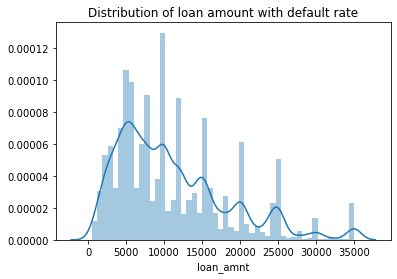

In [97]:
#Create a distribution plot for loan_amnt
plt.title('Distribution of loan amount with default rate')
sns.distplot(loan_df.loan_amnt)
plt.show()

#### From the above plot, nothing concrete can be said about the variation in the __loan_amnt__ so we can make use of binning to create a better visualisation

#### Let's check all the float data types

In [98]:
## Check for int data types
loan_df.loc[:,loan_df.dtypes == 'float64']

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti
0,5000.0,5000.0,4975.0,10.65,162.87,10.0,24000.0,27.65
1,2500.0,2500.0,2500.0,15.27,59.83,1.0,30000.0,1.00
2,2400.0,2400.0,2400.0,15.96,84.33,10.0,12252.0,8.72
3,10000.0,10000.0,10000.0,13.49,339.31,10.0,49200.0,20.00
5,5000.0,5000.0,5000.0,7.90,156.46,3.0,36000.0,11.20
...,...,...,...,...,...,...,...,...
39712,2500.0,2500.0,1075.0,8.07,78.42,4.0,110000.0,11.33
39713,8500.0,8500.0,875.0,10.28,275.38,3.0,18000.0,6.40
39714,5000.0,5000.0,1325.0,8.07,156.84,1.0,100000.0,2.30
39715,5000.0,5000.0,650.0,7.43,155.38,1.0,200000.0,3.72


#### Taking the columns in a variable named binnable

In [99]:
## Check for int data types
binnable = loan_df.loc[:,loan_df.dtypes == 'float64'].columns

#### We can create bins for these data and try to create a function that will do the same for all

#### Taking a backup of loan_df

In [100]:
# Taking a backup
new_df = loan_df.copy()

#### Creating a function to create bins for __loan_amnt__

In [101]:
# Function to do binning
def loan_bins(val):
    if val < 5000 :
        return 'low'
    elif val >= 5000 and val < 15000:
        return 'medium'
    elif val >= 15000 and val < 25000:
        return 'high'
    else:
        return 'very high'

In [102]:
# Applying the function to the loan amount
new_df['loan_amnt'] = new_df['loan_amnt'].apply(lambda x: loan_bins(x))

In [103]:
# Doing value counts
new_df['loan_amnt'].value_counts()

medium       20675
high          7696
low           7444
very high     2762
Name: loan_amnt, dtype: int64

#### Since the __loan amount__, __funded amount__ and __funded amount by inverstor__ are in similar range, we can apply the above function to __funded_amount__ and __funded_amount_inv__ as well

In [104]:
# Applying the function to the funded amount
new_df['funded_amnt'] = new_df['funded_amnt'].apply(lambda x: loan_bins(x))

In [105]:
# Applying the function to the funded amount
new_df['funded_amnt_inv'] = new_df['funded_amnt_inv'].apply(lambda x: loan_bins(x))

#### Creating a function to create bins for __int_rate__

In [106]:
# Function to do binning
def int_bins(val):
    if val <= 10 :
        return 'low'
    elif val > 10 and val <= 15:
        return 'medium'
    else:
        return 'high'

In [107]:
# Applying the function to the int rate
new_df['int_rate'] = new_df['int_rate'].apply(lambda x: int_bins(x))

#### Creating a function to create bins for __installment__

In [108]:
# Function to do binning
def instl_bins(val):
    if val <= 200 :
        return 'low'
    elif val > 200 and val <= 400:
        return 'medium'
    elif val > 400 and val <= 600:
        return 'high'
    else:
        return 'very high'

In [109]:
# Applying the function to the installment
new_df['installment'] = new_df['installment'].apply(lambda x: instl_bins(x))

#### Creating a function to create bins for __emp_length__

In [110]:
# Function to do binning
def emp_bins(val):
    if val <= 1 :
        return 'starter'
    elif val > 1 and val <= 3:
        return 'middle'
    elif val > 3 and val <= 7:
        return 'senior'
    else:
        return 'management'

In [111]:
# Applying the function to the int rate
new_df['emp_length'] = new_df['emp_length'].apply(lambda x: emp_bins(x))

#### Creating a function to create bins for __annual_inc__

In [112]:
# Function to do binning
def annual_bins(val):
    if val <= 50000:
        return 'low'
    elif val > 50000 and val <= 100000:
        return 'medium'
    elif val > 100000 and val <= 150000:
        return 'high'
    else:
        return 'very high'

In [113]:
# Applying the function to the annual_inc
new_df['annual_inc'] = new_df['annual_inc'].apply(lambda x: annual_bins(x))

#### Creating a function to create bins for __dti__

In [114]:
# Function to do binning
def dti_bins(val):
    if val <= 10 :
        return 'low'
    elif val > 10 and val <= 20:
        return 'medium'
    else:
        return 'very high'

In [115]:
# Applying the function to the int rate
new_df['dti'] = new_df['dti'].apply(lambda x: dti_bins(x))

In [116]:
# Checking the info
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  object        
 1   funded_amnt           38577 non-null  object        
 2   funded_amnt_inv       38577 non-null  object        
 3   term                  38577 non-null  category      
 4   int_rate              38577 non-null  object        
 5   installment           38577 non-null  object        
 6   grade                 38577 non-null  category      
 7   sub_grade             38577 non-null  category      
 8   emp_length            38577 non-null  object        
 9   home_ownership        38577 non-null  category      
 10  annual_inc            38577 non-null  object        
 11  verification_status   38577 non-null  category      
 12  issue_d               38577 non-null  datetime64[ns]
 13  loan_status     

#### We see that the data type for the columns for which we have done binning are of object datatype now, let's convert to category datatype

### Let's explore the categorical type values

In [117]:
# Checking for category datatypes
new_df.loc[:,new_df.dtypes == 'category']

,term,grade,sub_grade,home_ownership,verification_status,addr_state,pub_rec_bankruptcies
0,36 months,B,B2,RENT,Verified,AZ,0.0
1,60 months,C,C4,RENT,Source Verified,GA,0.0
2,36 months,C,C5,RENT,Not Verified,IL,0.0
3,36 months,C,C1,RENT,Source Verified,CA,0.0
5,36 months,A,A4,RENT,Source Verified,AZ,0.0
...,...,...,...,...,...,...,...
39712,36 months,A,A4,MORTGAGE,Not Verified,CO,0.0
39713,36 months,C,C1,RENT,Not Verified,NC,0.0
39714,36 months,A,A4,MORTGAGE,Not Verified,MA,0.0
39715,36 months,A,A2,MORTGAGE,Not Verified,MD,0.0


### Univariate analysis

#### Let's explore these columns one by one

#### We will first create a function to create the graphs for different variables that will also return the percentage differnece between lowest and highest default rate

In [118]:
# Function to draw graph
def create_graph(data, xval, *diffvals, yval='default_status' , kind = 'bar'):
    count = 0
    for i in xval: 
        if i == '_': 
            count = count + 1
    if kind == 'bar':
        plt.figure(figsize=(12,6))
        
        if count == 1:
            xlab = xval.split('_')[0].title() + ' ' + xval.split('_')[1].title()
        elif count == 2:
            xlab = xval.split('_')[0].title() + ' ' + xval.split('_')[1].title() + ' ' + xval.split('_')[2].title()
        else:
            xlab = xval.title()
        #Checking the top defaulter
        top_defaulter = data.groupby(by= xval)[yval].mean().sort_values(ascending = False).index[0]
        #Finding the highest probability
        highest_prob = round(data.groupby(by= xval)[yval].mean().sort_values(ascending = False).values[0],2)
        #Finding the lowest probability
        lowest_prob =  round(data.groupby(by= xval)[yval].mean().sort_values().values[0],2)
        #Finding the difference rate
        diff_rate = 100*(highest_prob - lowest_prob)
        # Converting to int
        diff_rate = str(round(diff_rate.astype('int')))
        #Assigning value to dictinary key
        diff_vals[xval] = diff_rate
        ax = sns.barplot(x= xval, y = yval,data = data)
        for p in ax.patches:
            prop = '{:.2f}'.format(p.get_height())
            x = (p.get_x() + p.get_width() / 2.) - 0.3
            y =  p.get_height() + 0.005
            ax.annotate(prop, (x, y))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.suptitle('Default rate with {}'.format(xlab)  + '', fontsize = 14)
        plt.xlabel(xlab, size = 14)
        plt.ylabel('Default rate', size = 14)
        plt.show()
        display(Markdown('### The highest default rate among {} is when {} is equal to {} with probability {} ###'.format(xlab, xlab, top_defaulter, highest_prob)))
        display(Markdown('### The variation between the lowest and highest default rate is {}% ###'.format(diff_rate)))
        display(Markdown('-----------------------------------------------------------------'))
        return diff_vals

#### Let's check the function for the purpose column

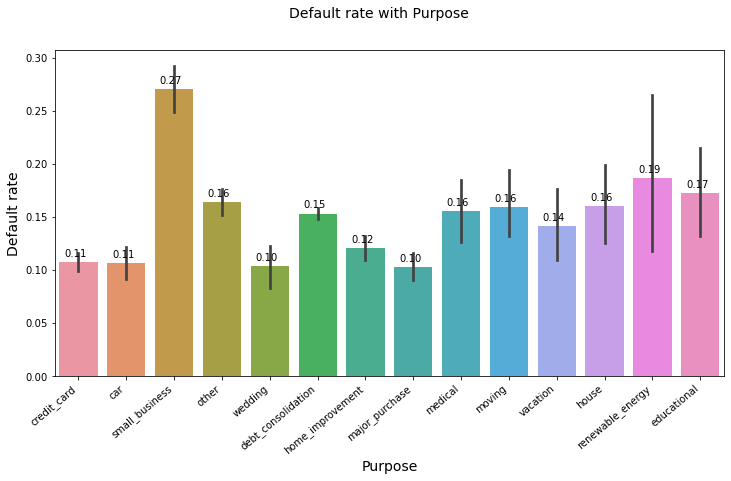

### The highest default rate among Purpose is when Purpose is equal to small_business with probability 0.27 ###

### The variation between the lowest and highest default rate is 17% ###

-----------------------------------------------------------------

{'purpose': '17'}

In [119]:
diff_vals = {}
create_graph(new_df, 'purpose',*diff_vals)

#### Let's create the graphs for all categorical columns with the probabilty of default

In [120]:
## Taking the columns in a variable
cat_cols = new_df.loc[:,new_df.dtypes == 'category'].columns

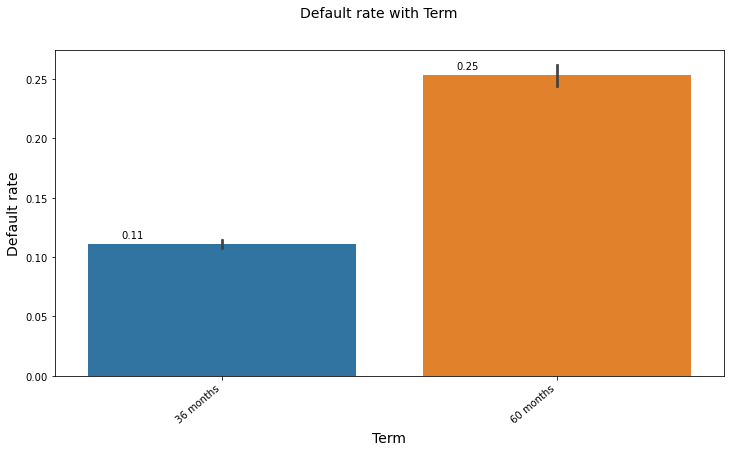

### The highest default rate among Term is when Term is equal to  60 months with probability 0.25 ###

### The variation between the lowest and highest default rate is 14% ###

-----------------------------------------------------------------

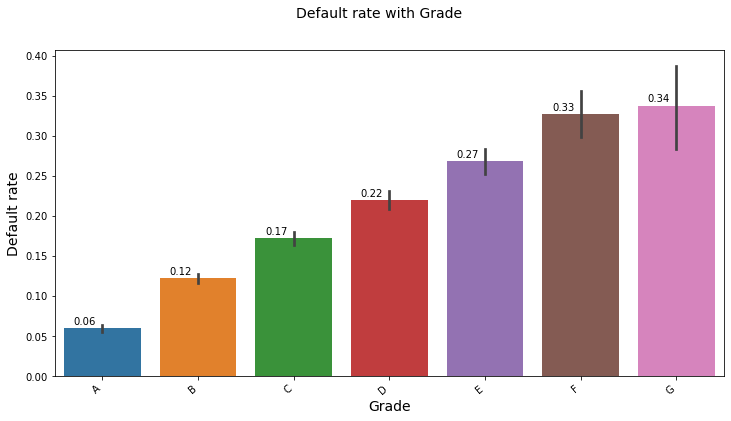

### The highest default rate among Grade is when Grade is equal to G with probability 0.34 ###

### The variation between the lowest and highest default rate is 28% ###

-----------------------------------------------------------------

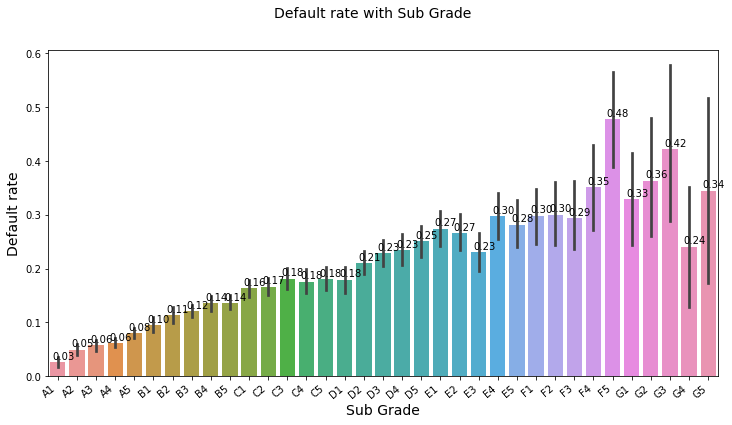

### The highest default rate among Sub Grade is when Sub Grade is equal to F5 with probability 0.48 ###

### The variation between the lowest and highest default rate is 44% ###

-----------------------------------------------------------------

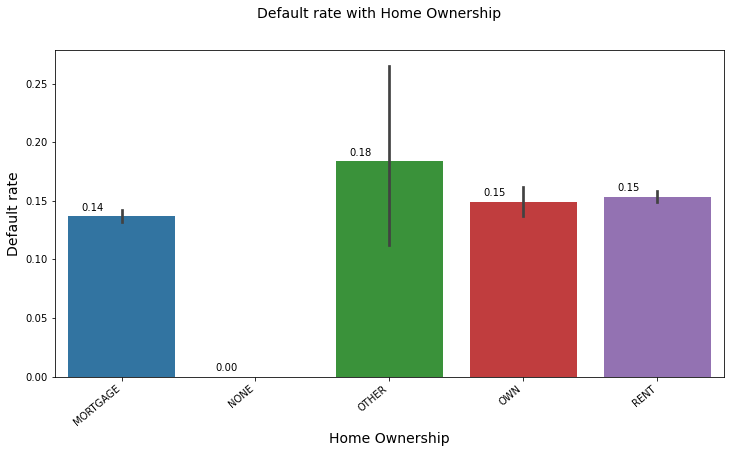

### The highest default rate among Home Ownership is when Home Ownership is equal to OTHER with probability 0.18 ###

### The variation between the lowest and highest default rate is 18% ###

-----------------------------------------------------------------

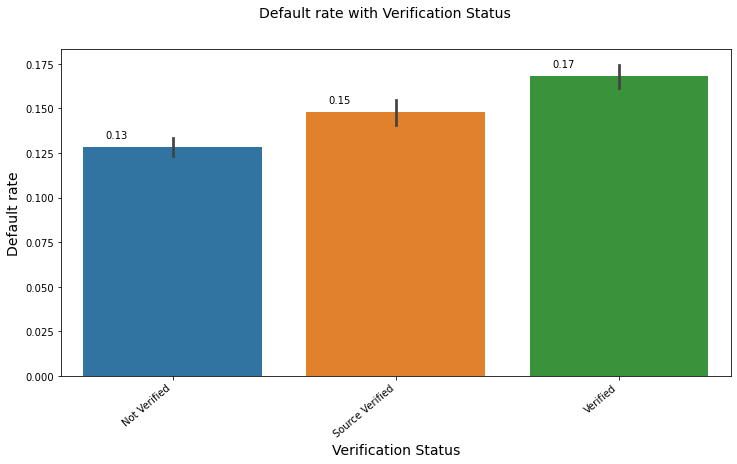

### The highest default rate among Verification Status is when Verification Status is equal to Verified with probability 0.17 ###

### The variation between the lowest and highest default rate is 4% ###

-----------------------------------------------------------------

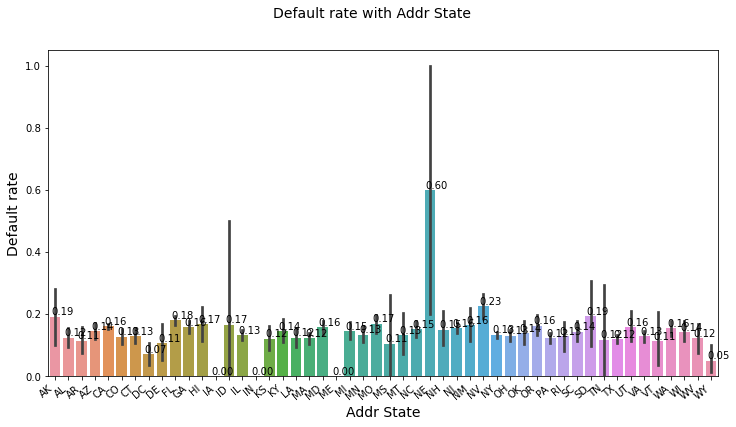

### The highest default rate among Addr State is when Addr State is equal to NE with probability 0.6 ###

### The variation between the lowest and highest default rate is 60% ###

-----------------------------------------------------------------

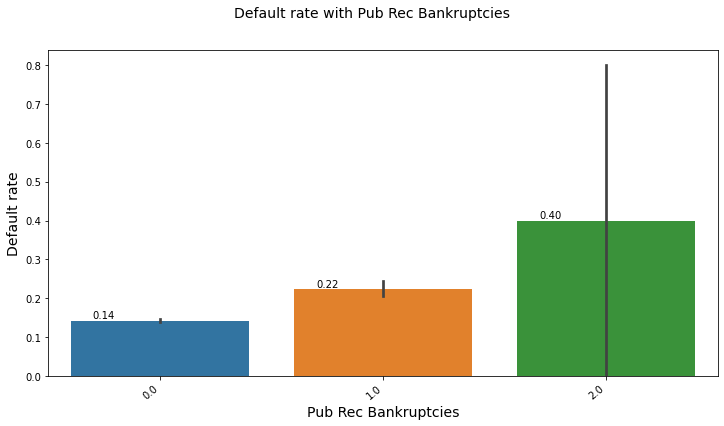

### The highest default rate among Pub Rec Bankruptcies is when Pub Rec Bankruptcies is equal to 2.0 with probability 0.4 ###

### The variation between the lowest and highest default rate is 26% ###

-----------------------------------------------------------------

In [121]:
# Calling the function for all categorical columns
diff_vals = {}
for col in cat_cols:
    create_graph(new_df, col,*diff_vals)

#### From the above graphs for categorical variables, we have the below observations:
- __There is an increasing trend in default rate with the term of the loan from 36 months to 60 months__
- __There is an increasing trend in default rate with the Grade from A to Grade G__
- __The default rate increases as we move within the subgrades with some exceptions in between__
- __There is a variation of default rate with Home Ownership from 0.0 as lowest for None to 0.18 as highest for Other__
- __The default rate is having an interesting relationship with Verification status. Surprisingly, default rate is low for Not Verified persons and high for Verified persons__
- __There is a variation of default rate with Purpose from 0.10 as lowest for Major purphase and Wedding to 0.27 as highest for Small busineses__
- __There is a variation of default rate with Addr State from 0.0 for some states to 0.60 for NE__
- __As expected, there is an increasing trend in default rate with respect to Pub Rec Bankruptcies as the number increases from 0 to 2__

#### Let's check the difference rate for different variables obtained along with graphs from the above functions

In [122]:
# Checking the difference rate for all variables
diff_vals

{'term': '14',
 'grade': '28',
 'sub_grade': '44',
 'home_ownership': '18',
 'verification_status': '4',
 'addr_state': '60',
 'pub_rec_bankruptcies': '26'}

### From the above, we can say that the columns, __term__, __grade__, __sub_grade__, __addr_state__ and __pub_rec_bankruptcies__ have a high variance in default rate range

#### Also from the above, the __home_ownership__ for None is showing no data, so we can remove records with __home_ownership__ from our dataset. Let's do a value counts

In [123]:
# Doing a value count
new_df.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

#### There are only 3 values with NONE, so we can remove those

In [124]:
# Convert to object
new_df['home_ownership'] = new_df['home_ownership'].astype('object')

In [125]:
# Remove NONE type
new_df = new_df[new_df['home_ownership'].isin(['RENT', 'MORTGAGE', 'OWN', 'OTHER'])]
new_df['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
Name: home_ownership, dtype: int64

### Now, we can take some of the predictors like term, __grade__, __home_ownership__ and __purpose__ for our further analysis

#### Let's check for the binnable columns

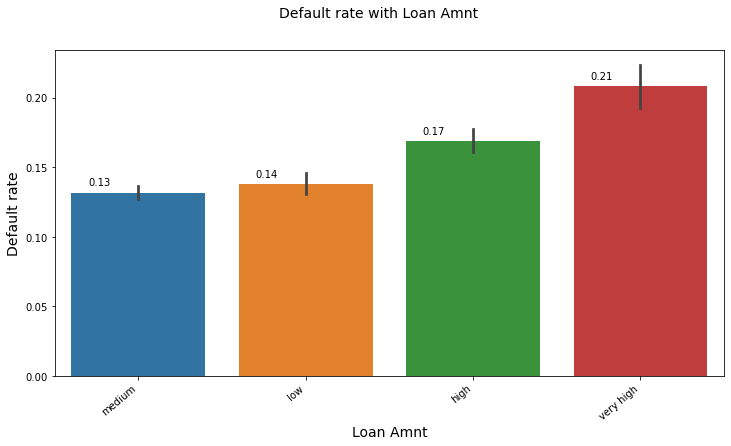

### The highest default rate among Loan Amnt is when Loan Amnt is equal to very high with probability 0.21 ###

### The variation between the lowest and highest default rate is 7% ###

-----------------------------------------------------------------

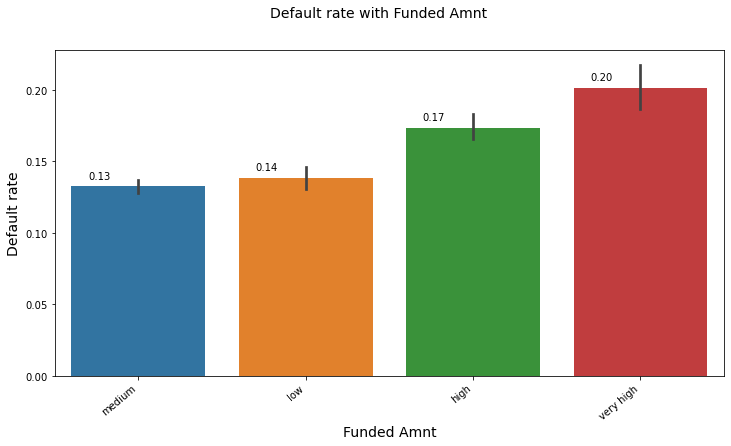

### The highest default rate among Funded Amnt is when Funded Amnt is equal to very high with probability 0.2 ###

### The variation between the lowest and highest default rate is 7% ###

-----------------------------------------------------------------

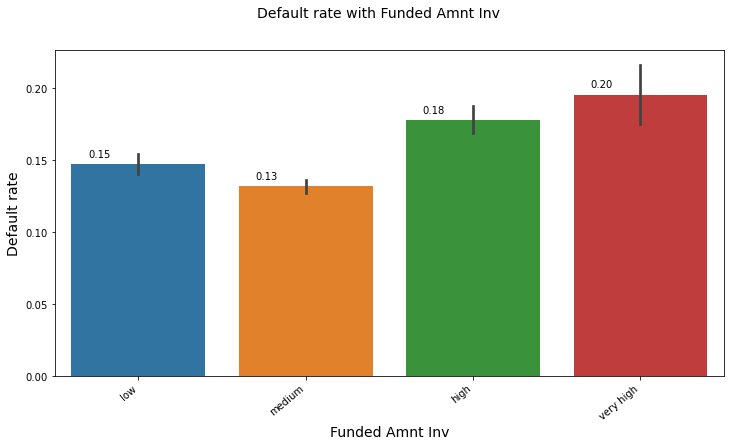

### The highest default rate among Funded Amnt Inv is when Funded Amnt Inv is equal to very high with probability 0.2 ###

### The variation between the lowest and highest default rate is 7% ###

-----------------------------------------------------------------

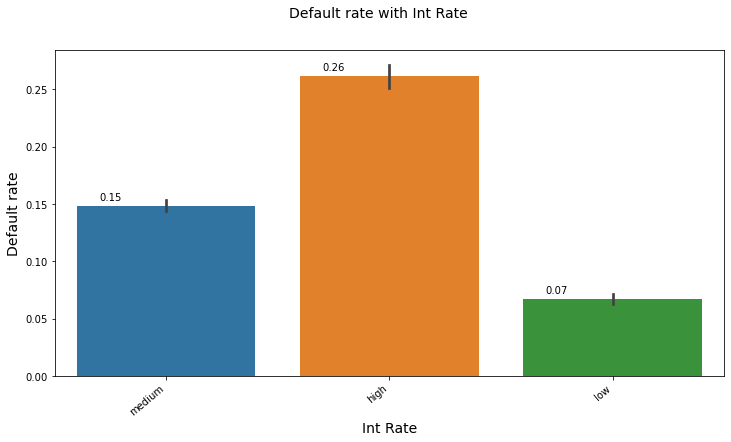

### The highest default rate among Int Rate is when Int Rate is equal to high with probability 0.26 ###

### The variation between the lowest and highest default rate is 19% ###

-----------------------------------------------------------------

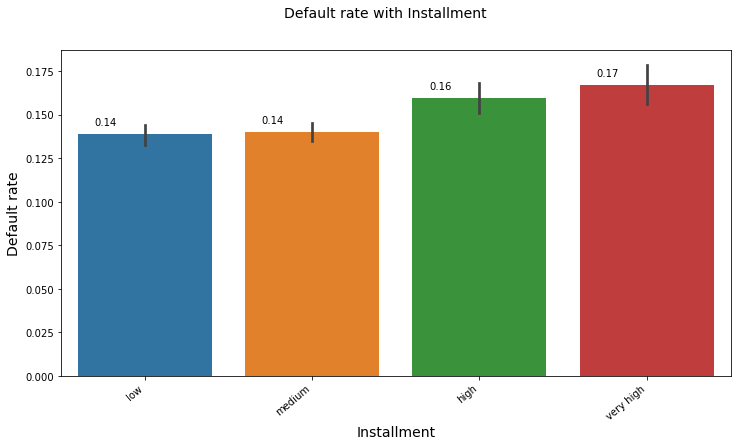

### The highest default rate among Installment is when Installment is equal to very high with probability 0.17 ###

### The variation between the lowest and highest default rate is 3% ###

-----------------------------------------------------------------

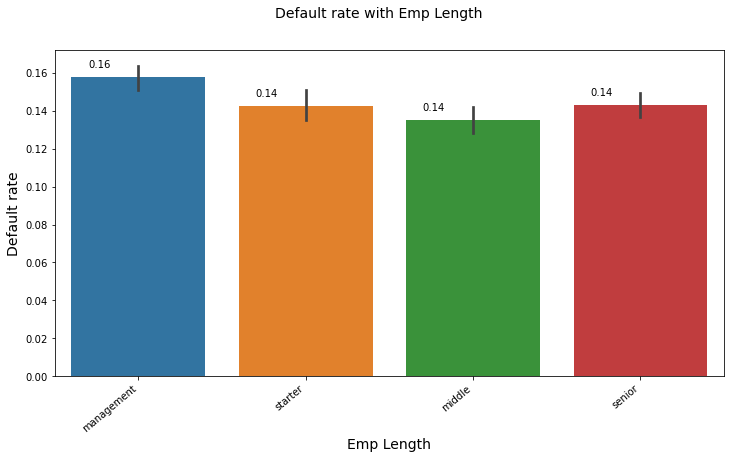

### The highest default rate among Emp Length is when Emp Length is equal to management with probability 0.16 ###

### The variation between the lowest and highest default rate is 1% ###

-----------------------------------------------------------------

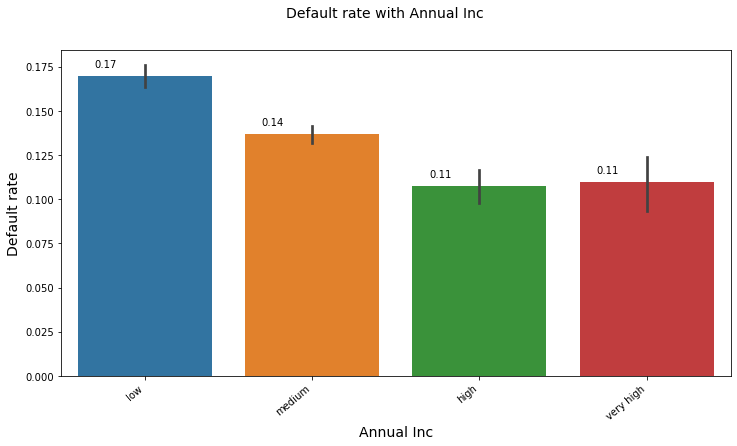

### The highest default rate among Annual Inc is when Annual Inc is equal to low with probability 0.17 ###

### The variation between the lowest and highest default rate is 6% ###

-----------------------------------------------------------------

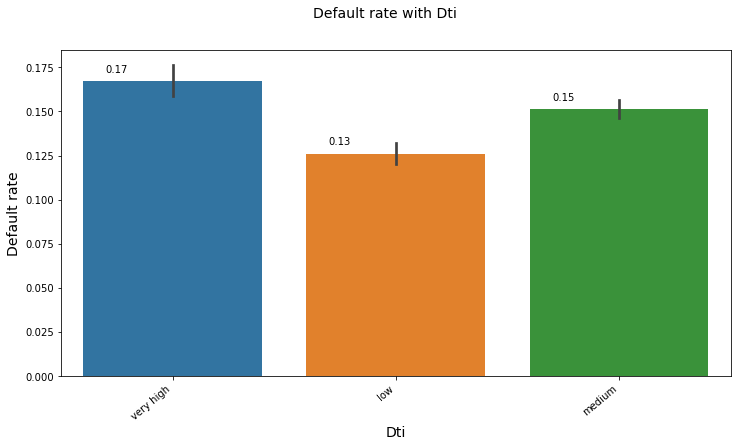

### The highest default rate among Dti is when Dti is equal to very high with probability 0.17 ###

### The variation between the lowest and highest default rate is 4% ###

-----------------------------------------------------------------

In [126]:
# Calling function for all the columns which we binned
for col in binnable:
    create_graph(new_df, col)

#### From the above graphs for binnable variables, we have the below observations:
- __The top two default rates with respect to Loan amount are for high and very high loan amounts, i.e for amounts greater than 15000__
- __The top two default rates with respect to Funded amount are for high and very high Funded amounts, i.e for amounts greater than 15000__
- __The top two default rates with respect to Funded amount by investors are for high and very high Funded amount by investors amounts, i.e for amounts greater than 15000__
- __There is an increasing trend in default rate with the interest rate from low to high__
- __The default rate is equal for low and medium installments at 0.14 but has an increasing trend with installment__
- __There is a an intersting insight about the employment length, people with upto 7 years of experience has similr default rate aroud 0.14 but is highest at 0.16 above 7 years of experience__
- __There is a decreasing trend with respect to annual income, with highest for income group less than 50000 at 0.17 and lowest for high and very high income group above 150000 at 0.17__
- __The default rate decreases with respect to DTI with default rate highest at 0.17 for debt to income ratio >20 and lowest at 0.13 for debt to income ratio <= 10__

### From the above, now we can take some of the predictors like predictors are __loan_amnt__, __emp_length__, __int_rate__, __installment__, __dti__ and __annual_inc__

#### Let's now explore the columns with datatype datetime64[ns]

In [127]:
# Checking for datatime datatypes
new_df.loc[:,new_df.dtypes == 'datetime64[ns]']

,issue_d
0,2011-12-01
1,2011-12-01
2,2011-12-01
3,2011-12-01
5,2011-12-01
...,...
39712,2007-07-01
39713,2007-07-01
39714,2007-07-01
39715,2007-07-01


#### Let's draw plot for this column

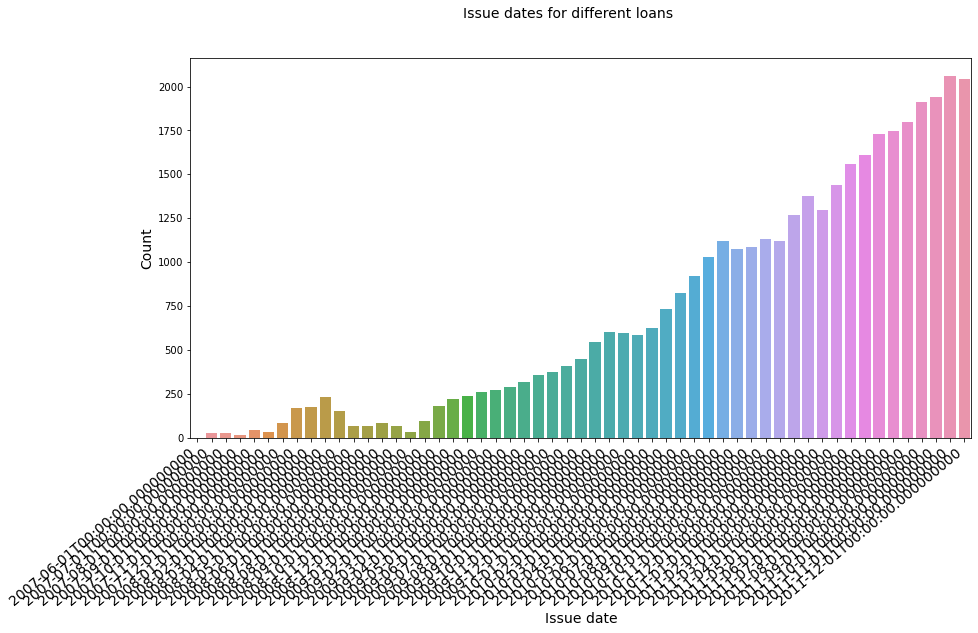

In [128]:
# Drawing the plot
plt.figure(figsize=(14,7))
ax = sns.countplot(x='issue_d',data = new_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize = 14)
plt.suptitle('Issue dates for different loans', fontsize = 14)
plt.xlabel('Issue date', size = 14)
plt.ylabel('Count', size = 14)
plt.show()

#### From the graph above, it's quite hard to analyse any pattern. let's take the 'year' and 'month' out of the above column and create the columns for it. After that, draw graph on basis of the year and month

### Creating a derived column

In [129]:
### Crating a new column issue_year 
new_df['issue_year'] =  new_df['issue_d'].apply(lambda x: x.year)
new_df['issue_month'] =  new_df['issue_d'].apply(lambda x: x.month)

#### Let's take a look at the shape and the new column

In [130]:
# Convert to category datatype
print(new_df.shape)
new_df.issue_year = new_df.issue_year.astype('category')
new_df.issue_month = new_df.issue_month.astype('category')

(38574, 21)


In [131]:
# Checking the records
new_df.loc[:,['issue_year','issue_month']]

,issue_year,issue_month
0,2011,12
1,2011,12
2,2011,12
3,2011,12
5,2011,12
...,...,...
39712,2007,7
39713,2007,7
39714,2007,7
39715,2007,7


### We can see that the column now shows the year and month. Let's draw a graph for year first to get a more clear view

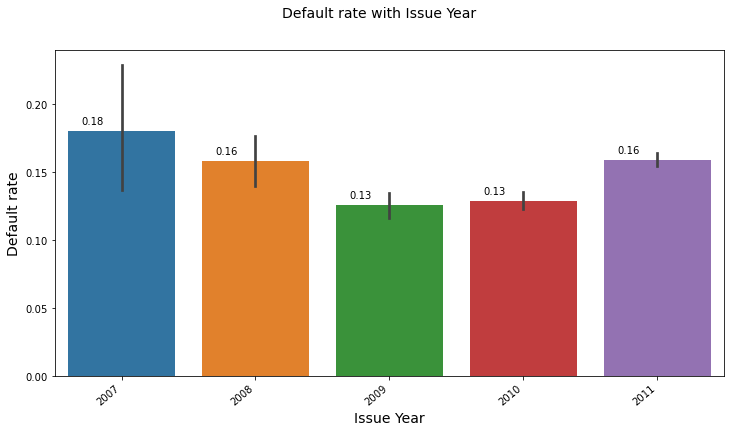

### The highest default rate among Issue Year is when Issue Year is equal to 2007 with probability 0.18 ###

### The variation between the lowest and highest default rate is 4% ###

-----------------------------------------------------------------

{'term': '14',
 'grade': '28',
 'sub_grade': '44',
 'home_ownership': '18',
 'verification_status': '4',
 'addr_state': '60',
 'pub_rec_bankruptcies': '26',
 'loan_amnt': '7',
 'funded_amnt': '7',
 'funded_amnt_inv': '7',
 'int_rate': '19',
 'installment': '3',
 'emp_length': '1',
 'annual_inc': '6',
 'dti': '4',
 'issue_year': '4'}

In [132]:
# Creating the graph for issue year and default probability
create_graph(new_df,'issue_year')

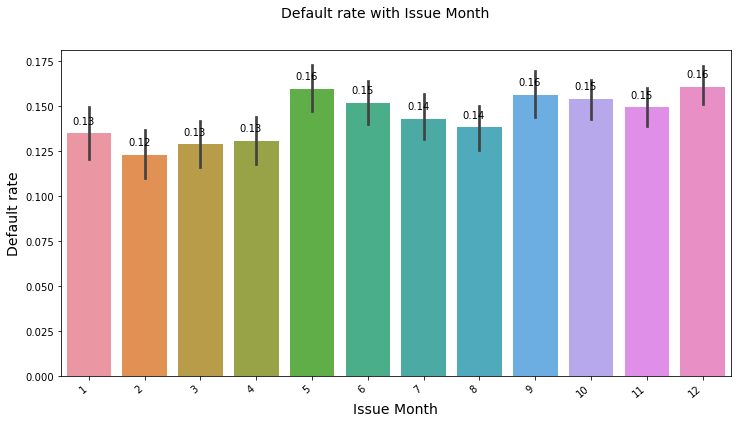

### The highest default rate among Issue Month is when Issue Month is equal to 12 with probability 0.16 ###

### The variation between the lowest and highest default rate is 4% ###

-----------------------------------------------------------------

{'term': '14',
 'grade': '28',
 'sub_grade': '44',
 'home_ownership': '18',
 'verification_status': '4',
 'addr_state': '60',
 'pub_rec_bankruptcies': '26',
 'loan_amnt': '7',
 'funded_amnt': '7',
 'funded_amnt_inv': '7',
 'int_rate': '19',
 'installment': '3',
 'emp_length': '1',
 'annual_inc': '6',
 'dti': '4',
 'issue_year': '4',
 'issue_month': '4'}

In [133]:
# Creating the graph for issue year and default probability
create_graph(new_df,'issue_month')

#### Let's keep the important columns from categorical and binnable list in a variable

In [135]:
# creating an array of imp columns
imp_predictors = ['term', 'grade', 'home_ownership', 'loan_amnt', 'emp_length', 'int_rate', 'installment', 'dti', 'annual_inc']

### Segmented Univariate Analysis

#### From the analysis till this point, we can identify the columns like __term__, __grade__, __home_ownership__, __year__, __emp_length__, __loan_amnt__ , __int_rate__, __installment__, __dti__ and __annual_inc__ are good enough to be considered for further analysis

#### Let's take a look at categorical columns again

In [136]:
# Checking for categorical columns
cat_cols

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'addr_state', 'pub_rec_bankruptcies'],
      dtype='object')

### Creating a function to draw graphs for segmented univariate analysis

In [137]:
# Creating a function to draw segmented graphs
def create_uni_graph(data, xval, hue, yval='default_status', kind = 'bar'):
    count = 0
    for i in xval: 
        if i == '_': 
            count = count + 1
    if kind == 'bar':
        plt.figure(figsize=(12,6))
        if count == 1:
            xlab = xval.split('_')[0].title() + ' ' + xval.split('_')[1].title()
            hueval = hue.split('_')[0].title() #+ ' ' + hue.split('_')[1].title()
        elif count == 2:
            xlab = xval.split('_')[0].title() + ' ' + xval.split('_')[1].title() + ' ' + xval.split('_')[2].title()
            hueval = hue.split('_')[0].title() + ' ' + hue.split('_')[1].title() + ' ' + hue.split('_')[2].title()
        else:
            xlab = xval.title()
            hueval = hue.title()
        vals = {}
        types = []
        for i in range(data[xval].nunique()):    
            types.append(data[xval].unique()[i].strip())
            hues =  pd.pivot_table(data, values = yval, index = hue, columns = xval).iloc[:,i].idxmax() + '-' + str(i)
            prob = round(pd.pivot_table(data, values = yval, index = hue, columns = xval).iloc[:,i].max(),2)
            vals[hues] = prob
        ax = sns.barplot(x= xval, y = yval,data = data, hue= hue)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.suptitle('Default rate with {} and {}'.format(xlab, hue)  + '', fontsize = 14)
        plt.xlabel(xlab, size = 14)
        plt.ylabel('Default rate', size = 14)
        plt.show()
        for j in range(data[xval].nunique()):
            display(Markdown('### The highest default rate for {} {} is for {} {} with probability {} ###'.format(xlab, types[j], list(vals.keys())[j].split('-')[0], hueval ,list(vals.values())[j])))
        
        display(Markdown('-----------------------------------------------------------------'))

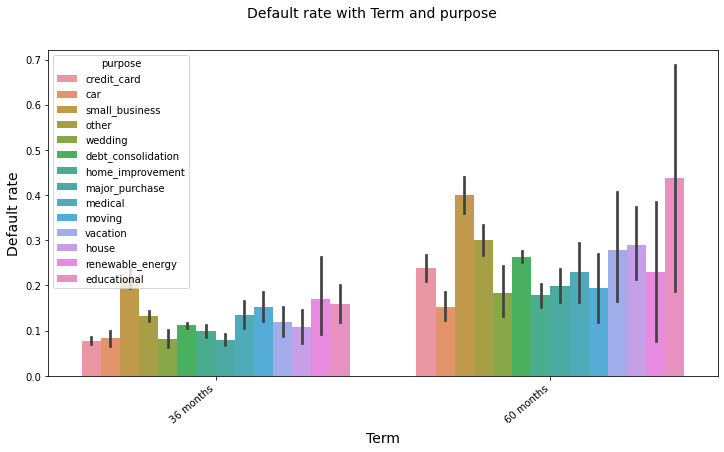

### The highest default rate for Term 36 months is for small_business Purpose with probability 0.22 ###

### The highest default rate for Term 60 months is for educational Purpose with probability 0.44 ###

-----------------------------------------------------------------

In [138]:
# Calling te function for term to check its working
create_uni_graph(new_df,'term', 'purpose')

#### The above graph is considering a lot of purpose values, we can filter out the top 5 purpose values on the basis of number of applications under each

In [139]:
# Checking the top 5 purpose values
new_df.purpose.value_counts().head(5)

debt_consolidation    18054
credit_card            5027
other                  3863
home_improvement       2875
major_purchase         2150
Name: purpose, dtype: int64

#### Let's store these in a variable

In [140]:
# keeping top 6 purpose in a variable top_5
top_5 = new_df.purpose.value_counts().head(5).index.to_list()


#### Let's filter our data for the top 5 purposes only to narrow down our analysis

In [141]:
# Taking the top 5 purpose values in dataframe
new_df = new_df[new_df['purpose'].isin(top_5)]
new_df['purpose'].value_counts()

debt_consolidation    18054
credit_card            5027
other                  3863
home_improvement       2875
major_purchase         2150
Name: purpose, dtype: int64

#### Let's create the above graph with top 5 purposes now

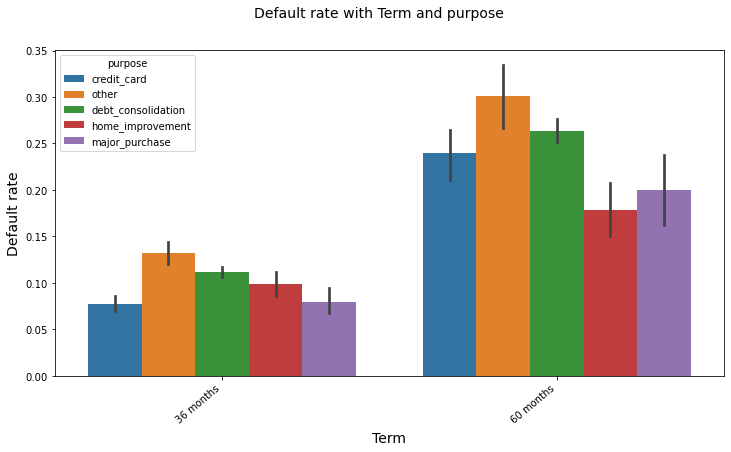

### The highest default rate for Term 36 months is for other Purpose with probability 0.13 ###

### The highest default rate for Term 60 months is for other Purpose with probability 0.3 ###

-----------------------------------------------------------------

In [142]:
# Calling function for top 5 purposes
create_uni_graph(new_df,'term', 'purpose')

#### Let's check for all the predictors we have kept in the column imp_predictors

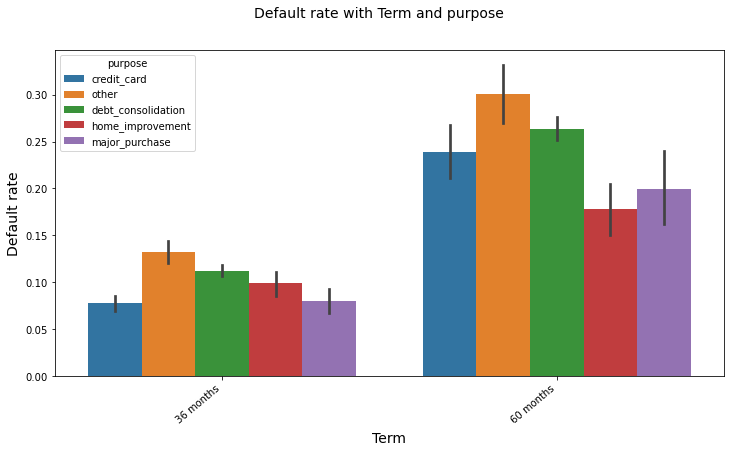

### The highest default rate for Term 36 months is for other Purpose with probability 0.13 ###

### The highest default rate for Term 60 months is for other Purpose with probability 0.3 ###

-----------------------------------------------------------------

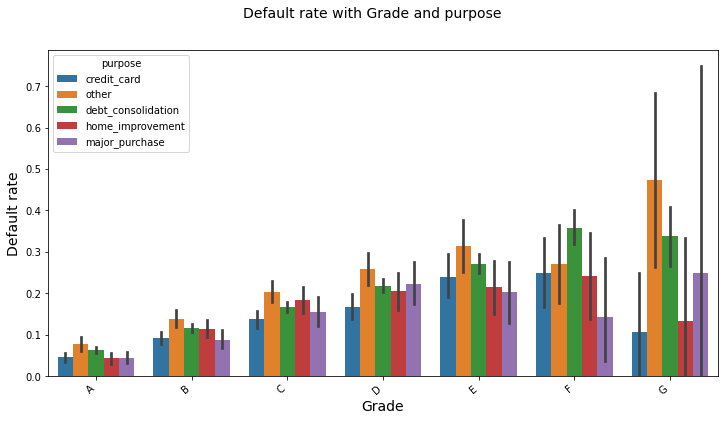

### The highest default rate for Grade B is for other Purpose with probability 0.08 ###

### The highest default rate for Grade C is for other Purpose with probability 0.14 ###

### The highest default rate for Grade D is for other Purpose with probability 0.2 ###

### The highest default rate for Grade A is for other Purpose with probability 0.26 ###

### The highest default rate for Grade E is for other Purpose with probability 0.31 ###

### The highest default rate for Grade F is for debt_consolidation Purpose with probability 0.36 ###

### The highest default rate for Grade G is for other Purpose with probability 0.47 ###

-----------------------------------------------------------------

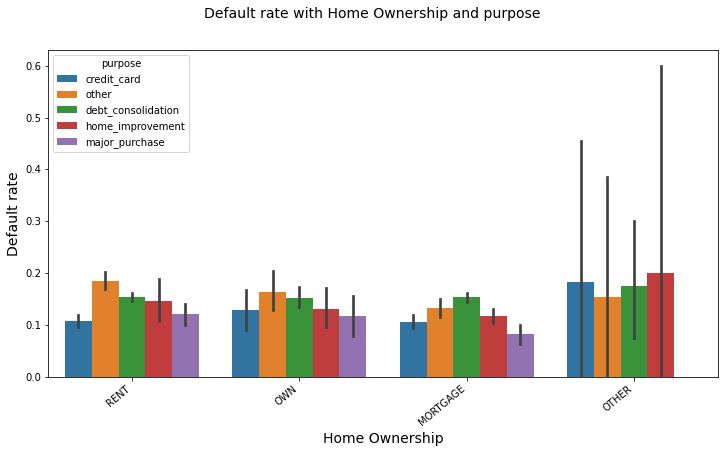

### The highest default rate for Home Ownership RENT is for debt_consolidation Purpose with probability 0.15 ###

### The highest default rate for Home Ownership OWN is for home_improvement Purpose with probability 0.2 ###

### The highest default rate for Home Ownership MORTGAGE is for other Purpose with probability 0.16 ###

### The highest default rate for Home Ownership OTHER is for other Purpose with probability 0.19 ###

-----------------------------------------------------------------

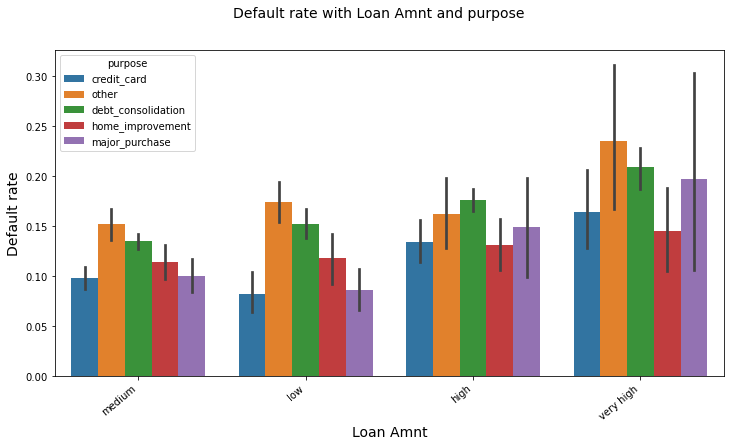

### The highest default rate for Loan Amnt medium is for debt_consolidation Purpose with probability 0.18 ###

### The highest default rate for Loan Amnt low is for other Purpose with probability 0.17 ###

### The highest default rate for Loan Amnt high is for other Purpose with probability 0.15 ###

### The highest default rate for Loan Amnt very high is for other Purpose with probability 0.23 ###

-----------------------------------------------------------------

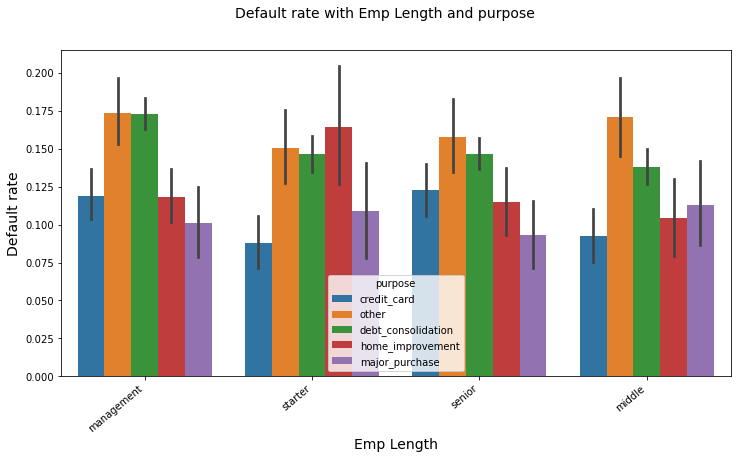

### The highest default rate for Emp Length management is for other Purpose with probability 0.17 ###

### The highest default rate for Emp Length starter is for other Purpose with probability 0.17 ###

### The highest default rate for Emp Length senior is for other Purpose with probability 0.16 ###

### The highest default rate for Emp Length middle is for home_improvement Purpose with probability 0.16 ###

-----------------------------------------------------------------

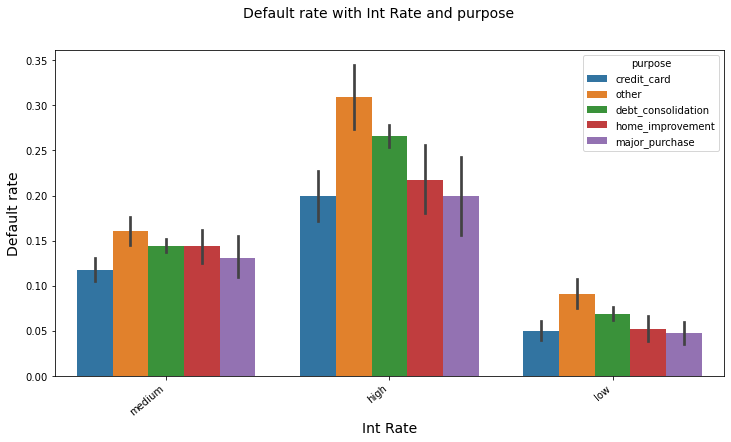

### The highest default rate for Int Rate medium is for other Purpose with probability 0.31 ###

### The highest default rate for Int Rate high is for other Purpose with probability 0.09 ###

### The highest default rate for Int Rate low is for other Purpose with probability 0.16 ###

-----------------------------------------------------------------

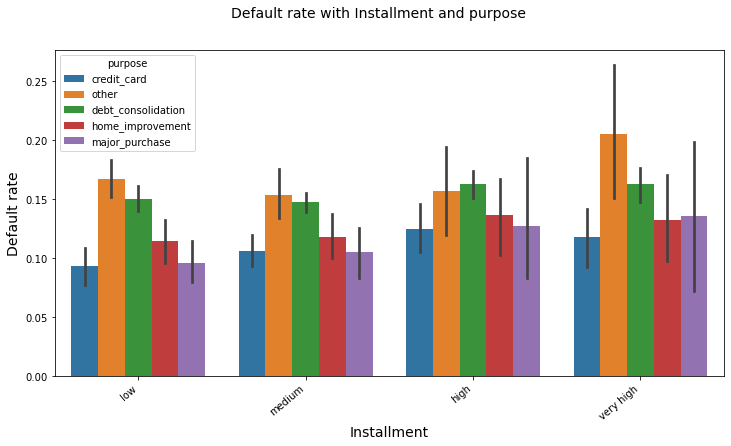

### The highest default rate for Installment low is for debt_consolidation Purpose with probability 0.16 ###

### The highest default rate for Installment medium is for other Purpose with probability 0.17 ###

### The highest default rate for Installment high is for other Purpose with probability 0.15 ###

### The highest default rate for Installment very high is for other Purpose with probability 0.2 ###

-----------------------------------------------------------------

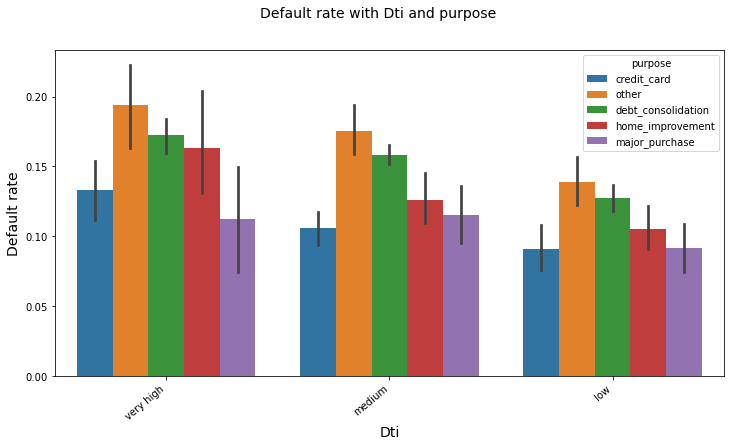

### The highest default rate for Dti very high is for other Purpose with probability 0.14 ###

### The highest default rate for Dti medium is for other Purpose with probability 0.18 ###

### The highest default rate for Dti low is for other Purpose with probability 0.19 ###

-----------------------------------------------------------------

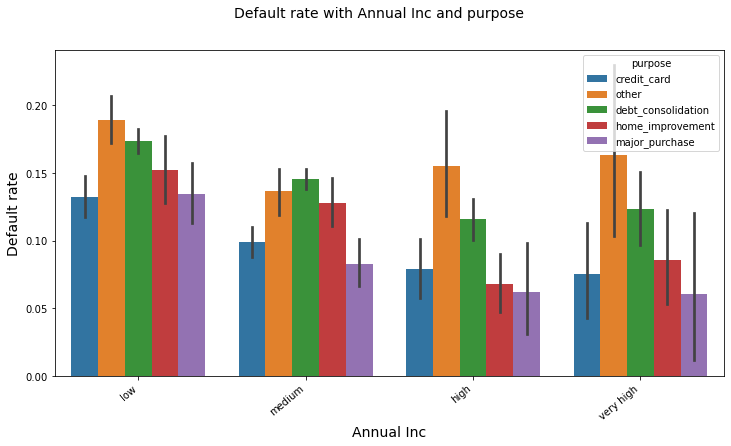

### The highest default rate for Annual Inc low is for other Purpose with probability 0.16 ###

### The highest default rate for Annual Inc medium is for other Purpose with probability 0.19 ###

### The highest default rate for Annual Inc high is for debt_consolidation Purpose with probability 0.15 ###

### The highest default rate for Annual Inc very high is for other Purpose with probability 0.16 ###

-----------------------------------------------------------------

In [143]:
# Calling for all the imp predictors with respect to purpose
for col in imp_predictors:
    create_uni_graph(new_df, col, 'purpose')

### Bivariate analysis

#### Now, we have done the Univariate and Segmented univariate analysis and we have found out some observations
#### Let's now explore the variables together and try to find out more patterns in the data

#### Let's create a correlation table to see the correlation among the variables, but we have to filter out the continuous variables first

#### We have two datasets with different datatypes, we have kept the continuous data in loan_df and the categorical data in __new_df__ for performing analysis

In [144]:
# Checking the data for float datatypes
loan_df.loc[:,loan_df.dtypes == 'float64']

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti
0,5000.0,5000.0,4975.0,10.65,162.87,10.0,24000.0,27.65
1,2500.0,2500.0,2500.0,15.27,59.83,1.0,30000.0,1.00
2,2400.0,2400.0,2400.0,15.96,84.33,10.0,12252.0,8.72
3,10000.0,10000.0,10000.0,13.49,339.31,10.0,49200.0,20.00
5,5000.0,5000.0,5000.0,7.90,156.46,3.0,36000.0,11.20
...,...,...,...,...,...,...,...,...
39712,2500.0,2500.0,1075.0,8.07,78.42,4.0,110000.0,11.33
39713,8500.0,8500.0,875.0,10.28,275.38,3.0,18000.0,6.40
39714,5000.0,5000.0,1325.0,8.07,156.84,1.0,100000.0,2.30
39715,5000.0,5000.0,650.0,7.43,155.38,1.0,200000.0,3.72


In [145]:
# Storing in a variable
cont_vars = loan_df.loc[:,loan_df.dtypes == 'float64']

In [146]:
#### check the correlation
cont_vars.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti
loan_amnt,1.000000,0.981790,0.937922,0.301265,0.932260,0.128705,0.268999,0.062436
funded_amnt,0.981790,1.000000,0.956172,0.304930,0.958035,0.128443,0.264798,0.062194
funded_amnt_inv,0.937922,0.956172,1.000000,0.297473,0.905464,0.141202,0.251981,0.070663
int_rate,0.301265,0.304930,0.297473,1.000000,0.277203,-0.012317,0.048899,0.110913
installment,0.932260,0.958035,0.905464,0.277203,1.000000,0.101792,0.267842,0.052038
emp_length,0.128705,0.128443,0.141202,-0.012317,0.101792,1.000000,0.093750,0.044185
annual_inc,0.268999,0.264798,0.251981,0.048899,0.267842,0.093750,1.000000,-0.121530
dti,0.062436,0.062194,0.070663,0.110913,0.052038,0.044185,-0.121530,1.000000


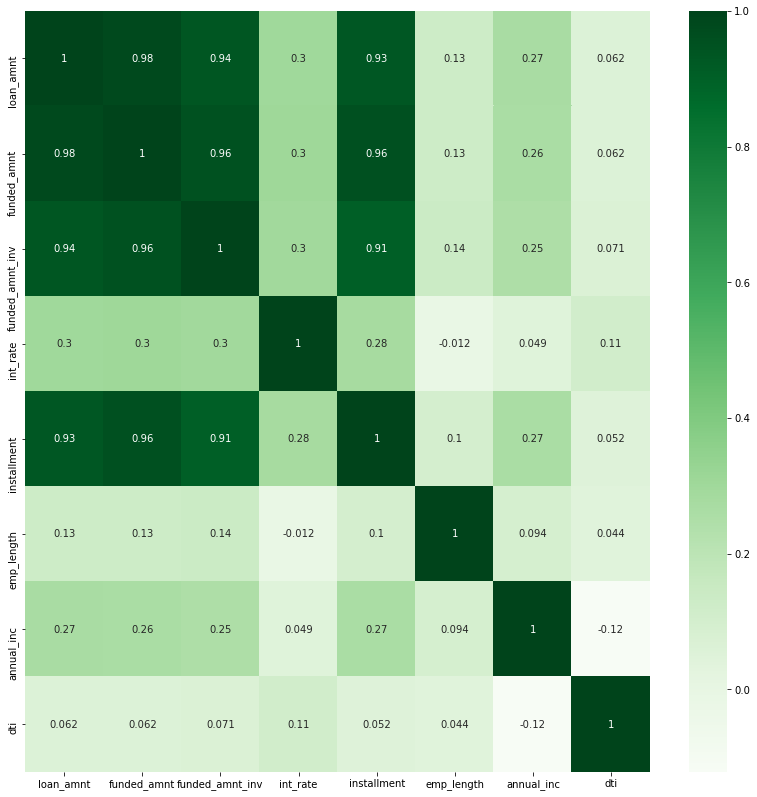

In [147]:
#### Drawing a heatmap
plt.figure(figsize  = (14,14))
sns.heatmap(cont_vars.corr(), cmap = 'Greens', annot = True)
plt.show()

#### Looking at the above plot, we find that the columns __loan_amt__, __funded_amt__ and __funded_amt_inv__ are highly correlated

#### Also, looking at the above plot we have below observations:
- __The 3 columns loan_amt, funded_amnt and funded_amnt_inv are having the similar correlation with other variables, so we will keep the loan_amount column only for our further analysis__
- __The installment column is directly proportional to loan_amnt and showcasing the similar correlation with other variables, we can remove this too__
- __The 2 columns out_prncp and out_prncp_inv are giving the similar correlation, so we will keep only out_prncp column__
- __The 2 columns total_pymnt and total_pymnt_inv  are also giving the similar correlation with variables , so we will keep only total_pymnt column further__

#### Let's create a new dataframe that keeps only the columns that we have identified in the previous step

In [148]:
# Taking columns except few columns
loan_df_updated = loan_df[loan_df.columns.difference(['funded_amnt', 'funded_amnt_inv','installment','out_prncp_inv','total_pymnt_inv'])]

#### Let's create the correlation matrix and create the heatmap again

In [149]:
# Assigning to variable
corr_data = loan_df_updated.loc[:,loan_df_updated.dtypes == 'float64']

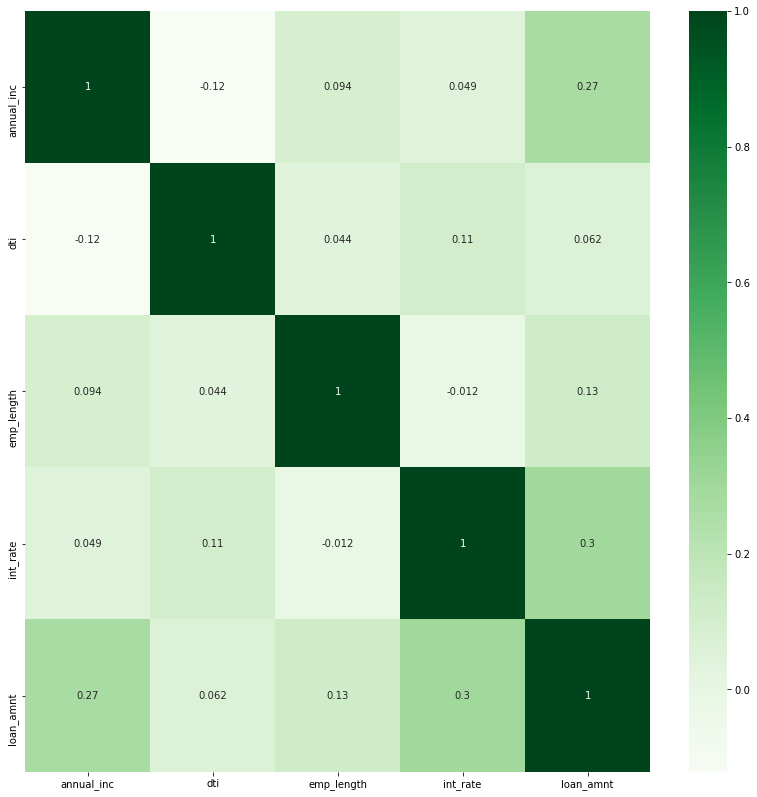

In [150]:
# Drawing the heatmap
plt.figure(figsize  = (14,14))
sns.heatmap(corr_data.corr(), cmap = 'Greens', annot = True)
plt.show()

#### From the above plot, we can see the correlation among different variables

#### Checking the data types

In [151]:
# Checking the datatypes
loan_df_updated.dtypes

addr_state                    category
annual_inc                     float64
default_status                   int64
dti                            float64
emp_length                     float64
grade                         category
home_ownership                category
int_rate                       float64
issue_d                 datetime64[ns]
loan_amnt                      float64
loan_status                     object
pub_rec_bankruptcies          category
purpose                         object
sub_grade                     category
term                          category
verification_status           category
dtype: object

### Next, we will see distribution of data, using pairplot

#### Let's keep the variables that we will require to draw pairplots in a variable name pairs

In [152]:
# Crating a list for variables for which we have to draw pairplot
pairs = ['annual_inc', 'default_status','dti','emp_length', 'int_rate','loan_amnt', 'purpose']

#### Also, we have already identified the top 5 purposes, we can filter our data for those purposes only

In [153]:
## Keeping the data in a variable
paired_data = loan_df_updated[loan_df_updated.loc[:,pairs].purpose.isin(top_5)]

#### Let's create a pairplot for the above dataset to view the relationship between different variables.

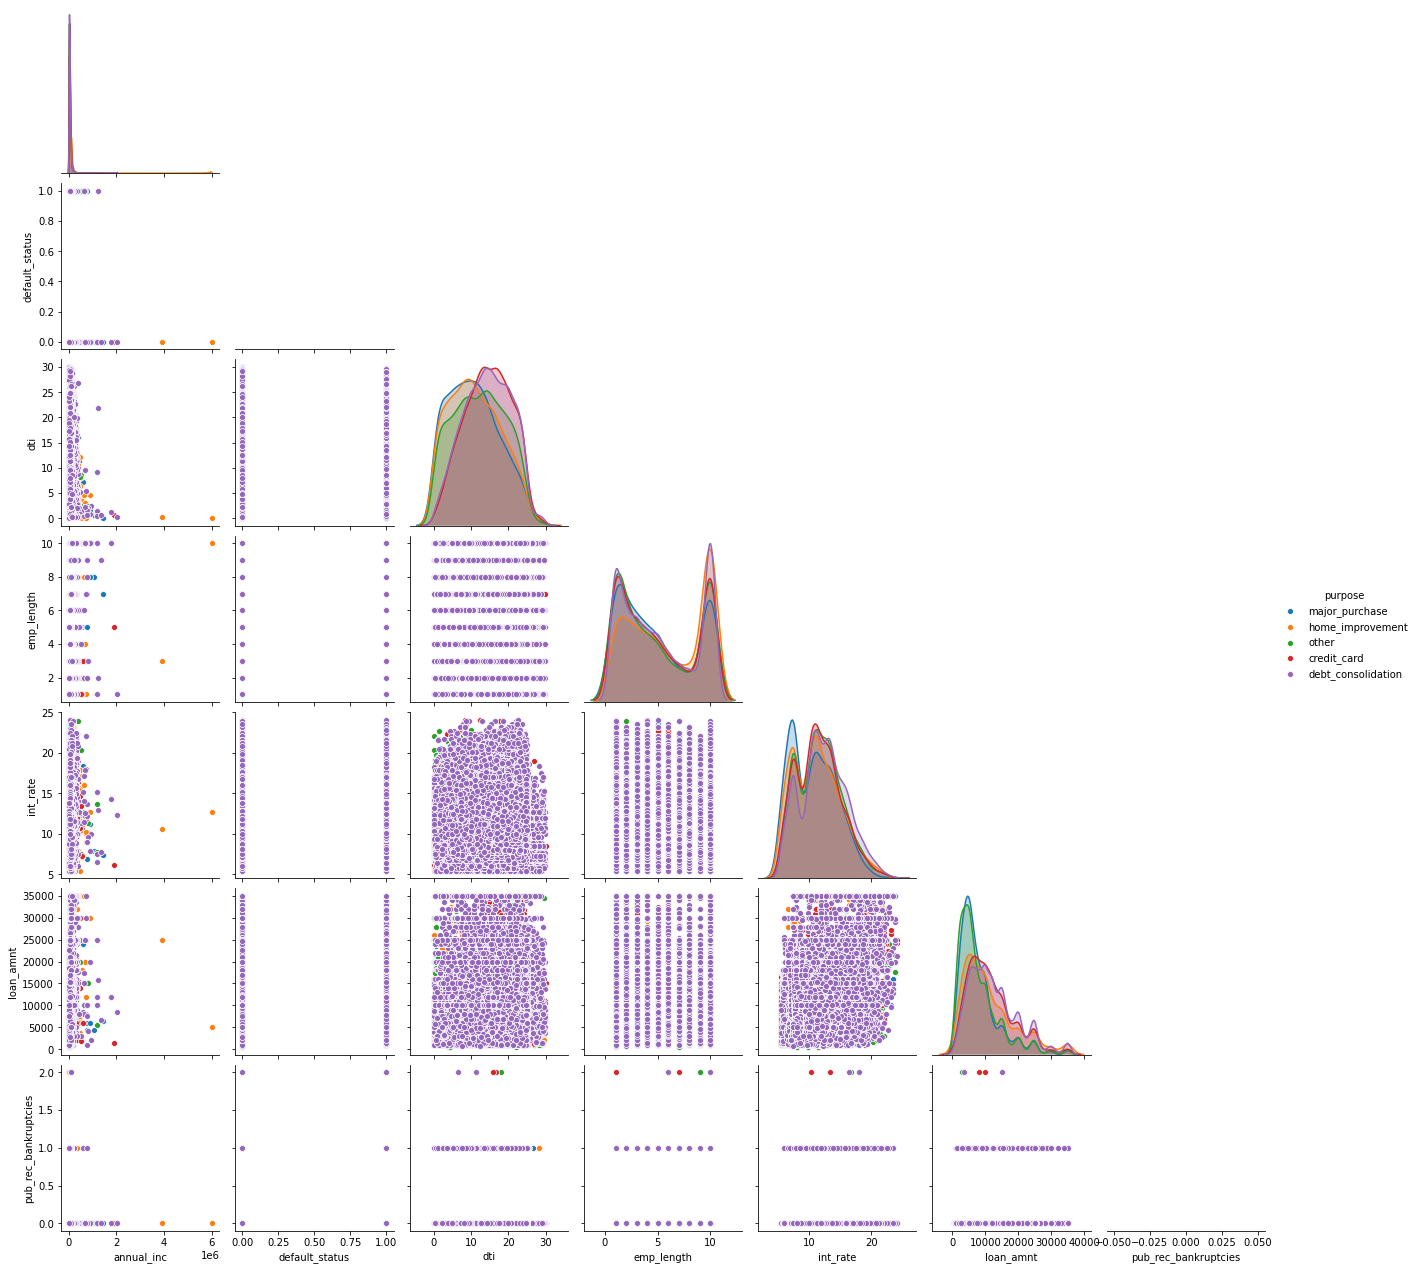

In [154]:
## Creating a pairplot for different variables
sns.pairplot(paired_data, hue = 'purpose',corner = True,hue_order = paired_data.purpose.value_counts().sort_values().index)
plt.show()

#### From the above graph, we can make below observations:
- __The low income group has similar distribution for defaulters and non defaulter with major purpose of debt consolidation, some high income group peolpes took loan for home improvement and did not default__
- __The debt to income ratio varies from low to high for low and medium income group customers, whereas people with each dti group have similar tendency to default__
- __Most of the loans taken by every employment length group with annual income low to medium are for debt consolidation purpose with some exceptions__
- __Interest rate are varying for low and high income groups, with high income group people taking loan at medium interest rates for home improvement purpose in some cases__
- __The interest rate and loan amount has similar distibution with debt to income and employment length__
- __There is high public record bankruptcy for some low income group people, but for the all income groups, we have a low number of public record bankruptcies__

### 4. Recommendations

#### From the analysis, we have the below recommendations to be made to the Lending Club:

#### 1. The Lending Club should keep regulation on the loan for longer terms, as there is high default rate for long term loans
#### 2. The Lending Club decides the grades and subgrades on the basis of riskiness of the loan. They should keep regulation on the loans for higher grades and subgrades 
#### 3. The Lending Club should keep regulation on the loans for small business, renewable energy and education purpose as these have a higher tendency to default
#### 4. The Lending Club should suspect the request from the state with state code 'NE' as these have a higher tendency to default
#### 5. The Lending Club should avoid lending the higher loan amounts, as there is high default rate for higher amount loans.
#### 6. The Lending Club should review its policy for int rate, as there is high default rate for high interest rate
#### 7. The Lending Club should avoid giving loans to people with high DTI as they have a high tendency to default
#### 8. They should review their policy to give loans to low income group as they have a high tendency to default
#### 9. As there is not much dependency of employment length on default rate, they are doing good in this area
#### 10. They should treat peoples asking for loan for the 'other' purpose and 'debt consolidation' purpose with raised eyebrows as these loans have a high rate of default compared to other purposes